<a href="https://colab.research.google.com/github/thea725/orbit-archive/blob/main/latihan/Credit_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import data

Cloning into 'Dataset'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 44 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


### Data Exploration

In [ ]:
# import libary
import pandas as pd
import seaborn as sns

In [ ]:
# import dataset dengan separatory (pemisah) ";" -->semicolon
df = pd.read_csv('https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen.csv', sep=';')

In [ ]:
df

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18611,10/04/2019,CBR 250RR STD,HITAM,INDIVIDUAL,PEREMPUAN,26/11/1984,Wringinanom,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, JASA","RP 2.000.001,- S/D RP 3.000.000,-",SLTA/SMU,YES,BELUM PERNAH MEMILIKI,BELUM PERNAH MEMILIKI,BERDAGANG,SAYA SENDIRI,Mengarang Cerita,BAIK,WNI
18612,02/08/2019,CBR 250RR ABS,HITAM,INDIVIDUAL,LAKI-LAKI,14/02/1994,Gresik,Kab. Gresik,Jawa Timur,RUMAH SEWA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,YAMAHA,AT AUTOMATIC,LAIN-LAIN,PASANGAN SUAMI ATAU ISTRI,Membaca,NaN,WNI
18613,29/07/2019,CBR 250RR ABS,MERAH,INDIVIDUAL,LAKI-LAKI,23/06/1998,Benjeng,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 700.001,- S/D RP 1.000.000,-",SLTA/SMU,YES,HONDA,CUB BEBEK,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
18614,15/03/2019,SUPER CUB C125,BIRU-PUTIH,INDIVIDUAL,LAKI-LAKI,18/08/1992,Kebomas,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Makan,NaN,WNI


In [ ]:
# drop duplicate row
df = df.drop_duplicates()

In [ ]:
# cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11406 entries, 0 to 18614
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SALES DATE              11406 non-null  object 
 1   TYPE MOTOR              11406 non-null  object 
 2   COLOR                   11406 non-null  object 
 3   KODE CUSTOMER           11406 non-null  object 
 4   JENIS KELAMIN           11406 non-null  object 
 5   TANGGAL LAHIR           11406 non-null  object 
 6   KECAMATAN SURAT         11406 non-null  object 
 7   KOTA SURAT              11406 non-null  object 
 8   PROPINSI                11406 non-null  object 
 9   STATUS RUMAH            11406 non-null  object 
 10  JENIS PENJUALAN STNK    11406 non-null  object 
 11  JENIS PENJUALAN SSU     11406 non-null  object 
 12  BESAR DP                6760 non-null   float64
 13  BESAR CICILAN           6760 non-null   float64
 14  LAMA CICILAN            6760 non-null 

In [ ]:
# cek null
df.isnull()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18551,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False
18552,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False
18609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18611,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# cek jumlah setiap type motor
df['TYPE MOTOR'].value_counts()

ALL NEW SCOOPY           3045
VARIO 150                1311
VARIO 125 CBS            1158
BEAT SPORTY CBS           996
VARIO 125 CBS ISS         961
PCX 150 CBS               859
BEAT SPORTY CBS ISS       731
BEAT SPORTY CW            679
PCX 150 ABS               312
BEAT STREET CBS           298
GENIO CBS                 227
GENIO CBS ISS             201
CB150R STREETFIRE SE       97
ADV150 CBS                 93
NEW CBR 150R STD           93
NEW SUPRA X 125 FI CW      87
CRF150L                    48
CB150R STREETFIRE STD      32
ADV150 ABS                 28
REVO FIT FI                23
CB150 VERZA CW             20
ALL NEW SONIC 150 R        18
REVO CW FI                 17
NEW VARIO 125 CBS ISS      16
NEW VARIO 150              14
NEW CBR 150R ABS            9
SUPRA GTR 150               8
NEW SUPRA X 125 FI SW       4
CBR 250RR STD               4
CB150 VERZA SW              4
CBR 250RR ABS               3
FORZA                       3
SUPER CUB C125              2
PCX HYBRID

In [ ]:
# nilai unik
df['KODE CUSTOMER'].unique()
#DROP

array(['INDIVIDUAL'], dtype=object)

In [ ]:
df['KETERANGAN'].value_counts()

SOPAN                      1213
BAIK                        701
RAMAH                       636
KONSUMEN BAIK               461
NON INDENT                  292
I                           259
PERSONAL                    230
0                           166
INDENT                      166
BAIK RAMAH                  147
PENDIAM                      87
MURAH SENYUM RAMAH           18
BIASA                        10
karakter                      8
RAMAH BAIK                    3
ORANGNYA BAIK DAN RAMAH       2
RAMHA                         2
1                             2
RAMAH BAHAGIA                 1
KONSUEMEN BAIK                1
KONSUEMN BAIK                 1
BAIIK                         1
BAIM RAMAH                    1
ORANGNYA BAIK HATI            1
PRNDIAM                       1
PERSONAL.                     1
Name: KETERANGAN, dtype: int64

In [ ]:
df['PENGELUARAN'].value_counts()

RP 1.000.001,- S/D RP 1.500.000,-    3664
RP 2.000.001,- S/D RP 3.000.000,-    3008
RP 1.500.001,- S/D RP 2.000.000,-    2874
RP 3.000.001,- S/D RP 4.000.000,-     853
RP 700.001,- S/D RP 1.000.000,-       597
<= RP 700.000,-                       364
> RP 4.000.000,-                       46
Name: PENGELUARAN, dtype: int64

In [ ]:
# membuat variabel baru
df_con = df

In [ ]:
# membuat variabel a
a = df['TYPE MOTOR'].unique()

In [ ]:
b = [15110000, 16970000, 18455000, 19535000, 17365000, 21910000,
               16665000, 17365000, 17465000, 16865000, 20325000, 21005000,
               21910000, 17945000, 18415000, 23680000, 24280000, 20290000,
               20945000, 29700000, 29700000, 31700000, 29700000, 30700000,
               34745000, 30845000, 34445000, 43650000, 24565000, 35186000,
               38251000, 61700000, 72800000, 84645000, 73645000, 24715000]

In [ ]:
# replace a ke harga motor dalam bentuk set
df_con = df_con.replace(a, b)

In [ ]:
df_con

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18551,16/07/2019,VARIO 150,MERAH,INDIVIDUAL,PEREMPUAN,27/09/1986,Bungah,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,IBU RUMAH TANGGA,"RP 1.500.001,- S/D RP 2.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
18552,15/07/2019,VARIO 150,COKLAT,INDIVIDUAL,LAKI-LAKI,17/05/1966,Cerme,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,GURU/ DOSEN,"RP 2.000.001,- S/D RP 3.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
18609,26/06/2019,CBR 250RR STD,HITAM,INDIVIDUAL,PEREMPUAN,23/01/1990,Kebomas,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,10000000.0,2050000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,SUZUKI,CUB BEBEK,BERDAGANG,SAYA SENDIRI,Makan,SOPAN,WNI
18611,10/04/2019,CBR 250RR STD,HITAM,INDIVIDUAL,PEREMPUAN,26/11/1984,Wringinanom,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, JASA","RP 2.000.001,- S/D RP 3.000.000,-",SLTA/SMU,YES,BELUM PERNAH MEMILIKI,BELUM PERNAH MEMILIKI,BERDAGANG,SAYA SENDIRI,Mengarang Cerita,BAIK,WNI


In [ ]:
# drop fitur selection
df_con = df_con.drop(['SALES DATE', 'COLOR', 'KODE CUSTOMER',
                      'TANGGAL LAHIR', 'KECAMATAN SURAT',	'KOTA SURAT', 'PROPINSI',
                       'KEBERSEDIAAN DIHUBUNGI', 'MERK MOTOR SBLMNYA', 'TYPE MOTOR SBLMNYA', 'SMH DIGUNAKAN UNTUK',
                       'HOBI', 'KETERANGAN', 'KEWARGANEGARAAN', 'AGAMA'], axis=1)

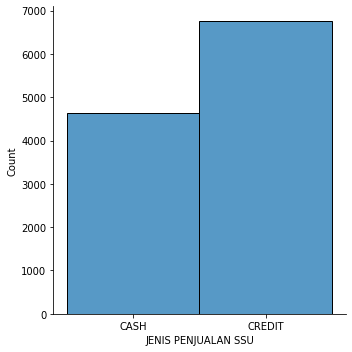

In [ ]:
sns.displot(df, x="JENIS PENJUALAN SSU")

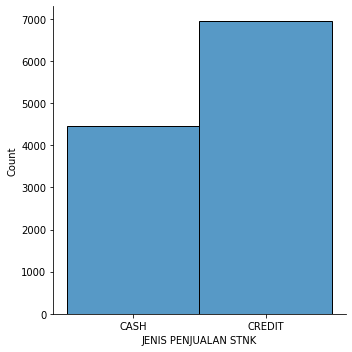

In [ ]:
sns.displot(df, x="JENIS PENJUALAN STNK")

In [ ]:
df_credit=df_con[(df['JENIS PENJUALAN STNK'] == "CREDIT") & (df['JENIS PENJUALAN SSU'] == 'CREDIT')]

In [ ]:
df_credit['LAMA CICILAN'].value_counts()

35.0    4120
23.0    1445
11.0     554
17.0     257
29.0     255
33.0      35
30.0      22
32.0       8
34.0       6
36.0       2
19.0       1
31.0       1
3.0        1
2.0        1
24.0       1
13.0       1
Name: LAMA CICILAN, dtype: int64

In [ ]:
df_credit

,TYPE MOTOR,JENIS KELAMIN,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,PEKERJAAN,PENGELUARAN,PENDIDIKAN,YG MENGGUNAKAN SMH
3,15110000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,SAYA SENDIRI
5,15110000,PEREMPUAN,RUMAH SENDIRI,CREDIT,CREDIT,1900000.0,580000.0,35.0,"WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN ...","RP 700.001,- S/D RP 1.000.000,-",SLTP/SMP,SAYA SENDIRI
6,15110000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,1600000.0,1090000.0,17.0,"WIRASWASTA / PEDAGANG, INDUSTRI","RP 1.500.001,- S/D RP 2.000.000,-",SLTA/SMU,SAYA SENDIRI
7,15110000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,10600000.0,600000.0,11.0,TNI/POLRI,"RP 1.500.001,- S/D RP 2.000.000,-",SLTA/SMU,SAYA SENDIRI
9,15110000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,1700000.0,606000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,SAYA SENDIRI
...,...,...,...,...,...,...,...,...,...,...,...,...
18532,24565000,PEREMPUAN,RUMAH SENDIRI,CREDIT,CREDIT,2600000.0,981000.0,35.0,IBU RUMAH TANGGA,"RP 1.500.001,- S/D RP 2.000.000,-",TIDAK TAMAT SD,SAYA SENDIRI
18533,24565000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,2900000.0,967000.0,35.0,"WIRASWASTA / PEDAGANG, PERDAGANGAN (RETAIL)","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,SAYA SENDIRI
18534,24565000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,6200000.0,1103000.0,23.0,"WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN ...","RP 1.500.001,- S/D RP 2.000.000,-",SD,SAYA SENDIRI
18549,24565000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,11100000.0,1000000.0,17.0,PEGAWAI NEGERI,"RP 2.000.001,- S/D RP 3.000.000,-",SLTA/SMU,SAYA SENDIRI


In [ ]:
df_credit  = df_credit.drop_duplicates()
df_credit

,TYPE MOTOR,JENIS KELAMIN,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,PEKERJAAN,PENGELUARAN,PENDIDIKAN,YG MENGGUNAKAN SMH
3,15110000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,SAYA SENDIRI
5,15110000,PEREMPUAN,RUMAH SENDIRI,CREDIT,CREDIT,1900000.0,580000.0,35.0,"WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN ...","RP 700.001,- S/D RP 1.000.000,-",SLTP/SMP,SAYA SENDIRI
6,15110000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,1600000.0,1090000.0,17.0,"WIRASWASTA / PEDAGANG, INDUSTRI","RP 1.500.001,- S/D RP 2.000.000,-",SLTA/SMU,SAYA SENDIRI
7,15110000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,10600000.0,600000.0,11.0,TNI/POLRI,"RP 1.500.001,- S/D RP 2.000.000,-",SLTA/SMU,SAYA SENDIRI
9,15110000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,1700000.0,606000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,SAYA SENDIRI
...,...,...,...,...,...,...,...,...,...,...,...,...
18532,24565000,PEREMPUAN,RUMAH SENDIRI,CREDIT,CREDIT,2600000.0,981000.0,35.0,IBU RUMAH TANGGA,"RP 1.500.001,- S/D RP 2.000.000,-",TIDAK TAMAT SD,SAYA SENDIRI
18533,24565000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,2900000.0,967000.0,35.0,"WIRASWASTA / PEDAGANG, PERDAGANGAN (RETAIL)","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,SAYA SENDIRI
18534,24565000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,6200000.0,1103000.0,23.0,"WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN ...","RP 1.500.001,- S/D RP 2.000.000,-",SD,SAYA SENDIRI
18549,24565000,LAKI-LAKI,RUMAH SENDIRI,CREDIT,CREDIT,11100000.0,1000000.0,17.0,PEGAWAI NEGERI,"RP 2.000.001,- S/D RP 3.000.000,-",SLTA/SMU,SAYA SENDIRI


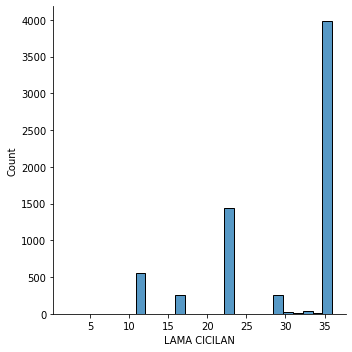

In [ ]:
sns.displot(df_credit, x="LAMA CICILAN")

In [ ]:
df['PENDIDIKAN'].value_counts()

SLTA/SMU           8431
SLTP/SMP           1133
SD                  721
AKADEMI/DIPLOMA     556
SARJANA             448
TIDAK TAMAT SD       93
PASCA SARJANA        24
Name: PENDIDIKAN, dtype: int64

In [ ]:
df['STATUS RUMAH'].value_counts()

RUMAH SENDIRI                 9099
RUMAH ORANG TUA / KELUARGA    2255
RUMAH SEWA                      52
Name: STATUS RUMAH, dtype: int64

In [ ]:
df['YG MENGGUNAKAN SMH'].value_counts()

SAYA SENDIRI                 10477
PASANGAN SUAMI ATAU ISTRI      611
ANAK                           207
LAIN-LAIN                      111
Name: YG MENGGUNAKAN SMH, dtype: int64

One Hot Encode : 'Jenis Kelamin', 'Pekerjaan', 'YG MENGGUNAKAN SMH', 'PENGELUARAN'





In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
pendidikan = df['PENDIDIKAN'].unique()
rumah = df['STATUS RUMAH'].unique()

In [ ]:
pendidikan

array(['AKADEMI/DIPLOMA', 'SLTA/SMU', 'SLTP/SMP', 'SARJANA', 'SD',
       'PASCA SARJANA', 'TIDAK TAMAT SD'], dtype=object)

In [ ]:
rumah

array(['RUMAH SENDIRI', 'RUMAH ORANG TUA / KELUARGA', 'RUMAH SEWA'],
      dtype=object)

In [ ]:
df_credit = df_credit.replace(pendidikan, [5, 4, 3, 6, 2,
                                           7, 1])
df_credit = df_credit.replace(rumah, [3,2,1])

In [ ]:
df_credit

,TYPE MOTOR,JENIS KELAMIN,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,PEKERJAAN,PENGELUARAN,PENDIDIKAN,YG MENGGUNAKAN SMH
3,15110000,LAKI-LAKI,3,CREDIT,CREDIT,1300000.0,634000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",4,SAYA SENDIRI
5,15110000,PEREMPUAN,3,CREDIT,CREDIT,1900000.0,580000.0,35.0,"WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN ...","RP 700.001,- S/D RP 1.000.000,-",3,SAYA SENDIRI
6,15110000,LAKI-LAKI,3,CREDIT,CREDIT,1600000.0,1090000.0,17.0,"WIRASWASTA / PEDAGANG, INDUSTRI","RP 1.500.001,- S/D RP 2.000.000,-",4,SAYA SENDIRI
7,15110000,LAKI-LAKI,3,CREDIT,CREDIT,10600000.0,600000.0,11.0,TNI/POLRI,"RP 1.500.001,- S/D RP 2.000.000,-",4,SAYA SENDIRI
9,15110000,LAKI-LAKI,3,CREDIT,CREDIT,1700000.0,606000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",4,SAYA SENDIRI
...,...,...,...,...,...,...,...,...,...,...,...,...
18532,24565000,PEREMPUAN,3,CREDIT,CREDIT,2600000.0,981000.0,35.0,IBU RUMAH TANGGA,"RP 1.500.001,- S/D RP 2.000.000,-",1,SAYA SENDIRI
18533,24565000,LAKI-LAKI,3,CREDIT,CREDIT,2900000.0,967000.0,35.0,"WIRASWASTA / PEDAGANG, PERDAGANGAN (RETAIL)","RP 3.000.001,- S/D RP 4.000.000,-",4,SAYA SENDIRI
18534,24565000,LAKI-LAKI,3,CREDIT,CREDIT,6200000.0,1103000.0,23.0,"WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN ...","RP 1.500.001,- S/D RP 2.000.000,-",2,SAYA SENDIRI
18549,24565000,LAKI-LAKI,3,CREDIT,CREDIT,11100000.0,1000000.0,17.0,PEGAWAI NEGERI,"RP 2.000.001,- S/D RP 3.000.000,-",4,SAYA SENDIRI


In [ ]:
df_credit_cor = df_credit.corr()

In [ ]:
df_credit_encode = pd.get_dummies(data=df_credit, columns=['JENIS KELAMIN','PEKERJAAN', 'YG MENGGUNAKAN SMH', 'PENGELUARAN'])

In [ ]:
df_credit_encode

,TYPE MOTOR,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,PENDIDIKAN,JENIS KELAMIN_LAKI-LAKI,JENIS KELAMIN_PEREMPUAN,PEKERJAAN_DOKTER,PEKERJAAN_GURU/ DOSEN,PEKERJAAN_IBU RUMAH TANGGA,PEKERJAAN_LAIN-LAIN,PEKERJAAN_MAHASISWA / PELAJAR,PEKERJAAN_OJEK,PEKERJAAN_PEGAWAI NEGERI,"PEKERJAAN_PEGAWAI SWASTA, INDUSTRI","PEKERJAAN_PEGAWAI SWASTA, JASA","PEKERJAAN_PEGAWAI SWASTA, KONSTRUKSI","PEKERJAAN_PEGAWAI SWASTA, PERDAGANGAN (RETAIL)","PEKERJAAN_PEGAWAI SWASTA, PERTAMBANGAN","PEKERJAAN_PEGAWAI SWASTA, PERTANIAN / PERKEBUNAN / KEHUTANAN / PERIKANAN / PETERNAKAN",PEKERJAAN_PENGACARA,PEKERJAAN_PETANI,PEKERJAAN_TNI/POLRI,"PEKERJAAN_WIRASWASTA / PEDAGANG, INDUSTRI","PEKERJAAN_WIRASWASTA / PEDAGANG, JASA","PEKERJAAN_WIRASWASTA / PEDAGANG, KONSTRUKSI","PEKERJAAN_WIRASWASTA / PEDAGANG, PERDAGANGAN (RETAIL)","PEKERJAAN_WIRASWASTA / PEDAGANG, PERTAMBANGAN","PEKERJAAN_WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN / KEHUTANAN / PERIKANAN / PETERNAKAN",YG MENGGUNAKAN SMH_ANAK,YG MENGGUNAKAN SMH_LAIN-LAIN,YG MENGGUNAKAN SMH_PASANGAN SUAMI ATAU ISTRI,YG MENGGUNAKAN SMH_SAYA SENDIRI,"PENGELUARAN_<= RP 700.000,-","PENGELUARAN_> RP 4.000.000,-","PENGELUARAN_RP 1.000.001,- S/D RP 1.500.000,-","PENGELUARAN_RP 1.500.001,- S/D RP 2.000.000,-","PENGELUARAN_RP 2.000.001,- S/D RP 3.000.000,-","PENGELUARAN_RP 3.000.001,- S/D RP 4.000.000,-","PENGELUARAN_RP 700.001,- S/D RP 1.000.000,-"
3,15110000,3,CREDIT,CREDIT,1300000.0,634000.0,35.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,15110000,3,CREDIT,CREDIT,1900000.0,580000.0,35.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,15110000,3,CREDIT,CREDIT,1600000.0,1090000.0,17.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7,15110000,3,CREDIT,CREDIT,10600000.0,600000.0,11.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
9,15110000,3,CREDIT,CREDIT,1700000.0,606000.0,35.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18532,24565000,3,CREDIT,CREDIT,2600000.0,981000.0,35.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
18533,24565000,3,CREDIT,CREDIT,2900000.0,967000.0,35.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
18534,24565000,3,CREDIT,CREDIT,6200000.0,1103000.0,23.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
18549,24565000,3,CREDIT,CREDIT,11100000.0,1000000.0,17.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
df_credit_encode = df_credit_encode.drop(['JENIS PENJUALAN STNK', 'JENIS PENJUALAN SSU'], axis=1)

###Trial

In [ ]:

from matplotlib import pyplot as plt

In [ ]:
df_credit_encode

,TYPE MOTOR,STATUS RUMAH,BESAR DP,BESAR CICILAN,LAMA CICILAN,PENDIDIKAN,JENIS KELAMIN_LAKI-LAKI,JENIS KELAMIN_PEREMPUAN,PEKERJAAN_DOKTER,PEKERJAAN_GURU/ DOSEN,PEKERJAAN_IBU RUMAH TANGGA,PEKERJAAN_LAIN-LAIN,PEKERJAAN_MAHASISWA / PELAJAR,PEKERJAAN_OJEK,PEKERJAAN_PEGAWAI NEGERI,"PEKERJAAN_PEGAWAI SWASTA, INDUSTRI","PEKERJAAN_PEGAWAI SWASTA, JASA","PEKERJAAN_PEGAWAI SWASTA, KONSTRUKSI","PEKERJAAN_PEGAWAI SWASTA, PERDAGANGAN (RETAIL)","PEKERJAAN_PEGAWAI SWASTA, PERTAMBANGAN","PEKERJAAN_PEGAWAI SWASTA, PERTANIAN / PERKEBUNAN / KEHUTANAN / PERIKANAN / PETERNAKAN",PEKERJAAN_PENGACARA,PEKERJAAN_PETANI,PEKERJAAN_TNI/POLRI,"PEKERJAAN_WIRASWASTA / PEDAGANG, INDUSTRI","PEKERJAAN_WIRASWASTA / PEDAGANG, JASA","PEKERJAAN_WIRASWASTA / PEDAGANG, KONSTRUKSI","PEKERJAAN_WIRASWASTA / PEDAGANG, PERDAGANGAN (RETAIL)","PEKERJAAN_WIRASWASTA / PEDAGANG, PERTAMBANGAN","PEKERJAAN_WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN / KEHUTANAN / PERIKANAN / PETERNAKAN",YG MENGGUNAKAN SMH_ANAK,YG MENGGUNAKAN SMH_LAIN-LAIN,YG MENGGUNAKAN SMH_PASANGAN SUAMI ATAU ISTRI,YG MENGGUNAKAN SMH_SAYA SENDIRI,"PENGELUARAN_<= RP 700.000,-","PENGELUARAN_> RP 4.000.000,-","PENGELUARAN_RP 1.000.001,- S/D RP 1.500.000,-","PENGELUARAN_RP 1.500.001,- S/D RP 2.000.000,-","PENGELUARAN_RP 2.000.001,- S/D RP 3.000.000,-","PENGELUARAN_RP 3.000.001,- S/D RP 4.000.000,-","PENGELUARAN_RP 700.001,- S/D RP 1.000.000,-"
3,15110000,3,1300000.0,634000.0,35.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,15110000,3,1900000.0,580000.0,35.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,15110000,3,1600000.0,1090000.0,17.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7,15110000,3,10600000.0,600000.0,11.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
9,15110000,3,1700000.0,606000.0,35.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18532,24565000,3,2600000.0,981000.0,35.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
18533,24565000,3,2900000.0,967000.0,35.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
18534,24565000,3,6200000.0,1103000.0,23.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
18549,24565000,3,11100000.0,1000000.0,17.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
features_scaled

array([[0.        , 1.        , 0.0119266 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.01743118, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.01467889, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.13597469, 1.        , 0.05688073, ..., 0.        , 0.        ,
        0.        ],
       [0.13597469, 1.        , 0.10183485, ..., 1.        , 0.        ,
        0.        ],
       [0.67002229, 1.        , 0.09174311, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
mmscaler = MinMaxScaler()
features_scaled = mmscaler.fit_transform(df_credit_encode)

In [ ]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_scaled)
    kmeanModel.fit(features_scaled)
    inertia.append(kmeanModel.inertia_)

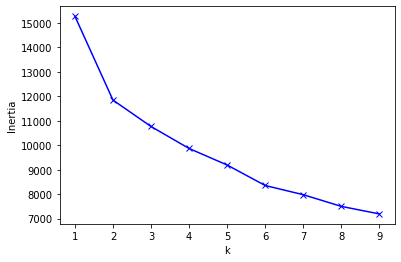

In [ ]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(features_scaled)

In [ ]:
labels = pd.DataFrame(kmeans.labels_)
df_credit_ = df_credit.drop(['JENIS PENJUALAN STNK', 'JENIS PENJUALAN SSU'], axis=1)
df_credit_ = df_credit_.reset_index(drop=True)
df_credit_ = pd.concat((df_credit_,labels),axis=1)
df_credit_ = df_credit_.rename({0:'labels'},axis=1)
df_credit_ = df_credit_.replace(b, a)

In [ ]:
df_credit_.loc[df_credit_['labels']==0]

,TYPE MOTOR,JENIS KELAMIN,STATUS RUMAH,BESAR DP,BESAR CICILAN,LAMA CICILAN,PEKERJAAN,PENGELUARAN,PENDIDIKAN,YG MENGGUNAKAN SMH,labels
6,REVO FIT FI,LAKI-LAKI,3,1600000.0,620000.0,35.0,"PEGAWAI SWASTA, JASA","RP 2.000.001,- S/D RP 3.000.000,-",4,SAYA SENDIRI,0
7,REVO CW FI,LAKI-LAKI,3,10700000.0,750000.0,11.0,"WIRASWASTA / PEDAGANG, PERDAGANGAN (RETAIL)","RP 2.000.001,- S/D RP 3.000.000,-",4,SAYA SENDIRI,0
11,NEW SUPRA X 125 FI SW,LAKI-LAKI,3,2000000.0,755000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 2.000.001,- S/D RP 3.000.000,-",4,SAYA SENDIRI,0
13,NEW SUPRA X 125 FI CW,LAKI-LAKI,2,10250000.0,1000000.0,11.0,PENGACARA,"RP 2.000.001,- S/D RP 3.000.000,-",3,SAYA SENDIRI,0
21,NEW SUPRA X 125 FI CW,LAKI-LAKI,3,2000000.0,778000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 2.000.001,- S/D RP 3.000.000,-",4,SAYA SENDIRI,0
...,...,...,...,...,...,...,...,...,...,...,...
6497,VARIO 150,LAKI-LAKI,3,3000000.0,965000.0,35.0,PETANI,"RP 2.000.001,- S/D RP 3.000.000,-",3,LAIN-LAIN,0
6506,VARIO 150,LAKI-LAKI,3,4400000.0,874000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 2.000.001,- S/D RP 3.000.000,-",2,SAYA SENDIRI,0
6523,VARIO 150,LAKI-LAKI,3,4900000.0,835000.0,35.0,"WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN ...","RP 2.000.001,- S/D RP 3.000.000,-",4,SAYA SENDIRI,0
6535,VARIO 150,LAKI-LAKI,3,2600000.0,1111000.0,29.0,"PEGAWAI SWASTA, INDUSTRI","RP 2.000.001,- S/D RP 3.000.000,-",4,SAYA SENDIRI,0


In [ ]:
df_credit_.loc[df_credit_['labels']==3]

,TYPE MOTOR,JENIS KELAMIN,STATUS RUMAH,BESAR DP,BESAR CICILAN,LAMA CICILAN,PEKERJAAN,PENGELUARAN,PENDIDIKAN,YG MENGGUNAKAN SMH,labels
2,REVO FIT FI,LAKI-LAKI,3,1600000.0,1090000.0,17.0,"WIRASWASTA / PEDAGANG, INDUSTRI","RP 1.500.001,- S/D RP 2.000.000,-",4,SAYA SENDIRI,3
3,REVO FIT FI,LAKI-LAKI,3,10600000.0,600000.0,11.0,TNI/POLRI,"RP 1.500.001,- S/D RP 2.000.000,-",4,SAYA SENDIRI,3
5,REVO FIT FI,LAKI-LAKI,3,11350000.0,250000.0,35.0,TNI/POLRI,"RP 1.500.001,- S/D RP 2.000.000,-",4,SAYA SENDIRI,3
8,REVO CW FI,LAKI-LAKI,3,1800000.0,676000.0,35.0,"PEGAWAI SWASTA, JASA","RP 3.000.001,- S/D RP 4.000.000,-",4,SAYA SENDIRI,3
14,NEW SUPRA X 125 FI CW,LAKI-LAKI,3,2000000.0,776000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 1.500.001,- S/D RP 2.000.000,-",2,SAYA SENDIRI,3
...,...,...,...,...,...,...,...,...,...,...,...
6537,VARIO 150,LAKI-LAKI,3,2500000.0,993000.0,35.0,"WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN ...","RP 3.000.001,- S/D RP 4.000.000,-",4,PASANGAN SUAMI ATAU ISTRI,3
6540,VARIO 150,LAKI-LAKI,3,2700000.0,977000.0,35.0,PEGAWAI NEGERI,"RP 3.000.001,- S/D RP 4.000.000,-",6,SAYA SENDIRI,3
6541,VARIO 150,LAKI-LAKI,3,2500000.0,1326000.0,23.0,"PEGAWAI SWASTA, INDUSTRI","RP 1.500.001,- S/D RP 2.000.000,-",4,SAYA SENDIRI,3
6545,VARIO 150,LAKI-LAKI,3,2900000.0,967000.0,35.0,"WIRASWASTA / PEDAGANG, PERDAGANGAN (RETAIL)","RP 3.000.001,- S/D RP 4.000.000,-",4,SAYA SENDIRI,3


In [ ]:
df_credit_['labels'].value_counts()

2    2837
3    1493
1    1260
0     959
Name: labels, dtype: int64

,TYPE MOTOR,JENIS KELAMIN,STATUS RUMAH,BESAR DP,BESAR CICILAN,LAMA CICILAN,PEKERJAAN,PENGELUARAN,PENDIDIKAN,YG MENGGUNAKAN SMH
3,15110000,LAKI-LAKI,3,1300000.0,634000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",4,SAYA SENDIRI
5,15110000,PEREMPUAN,3,1900000.0,580000.0,35.0,"WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN ...","RP 700.001,- S/D RP 1.000.000,-",3,SAYA SENDIRI
6,15110000,LAKI-LAKI,3,1600000.0,1090000.0,17.0,"WIRASWASTA / PEDAGANG, INDUSTRI","RP 1.500.001,- S/D RP 2.000.000,-",4,SAYA SENDIRI
7,15110000,LAKI-LAKI,3,10600000.0,600000.0,11.0,TNI/POLRI,"RP 1.500.001,- S/D RP 2.000.000,-",4,SAYA SENDIRI
9,15110000,LAKI-LAKI,3,1700000.0,606000.0,35.0,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",4,SAYA SENDIRI
...,...,...,...,...,...,...,...,...,...,...
18532,24565000,PEREMPUAN,3,2600000.0,981000.0,35.0,IBU RUMAH TANGGA,"RP 1.500.001,- S/D RP 2.000.000,-",1,SAYA SENDIRI
18533,24565000,LAKI-LAKI,3,2900000.0,967000.0,35.0,"WIRASWASTA / PEDAGANG, PERDAGANGAN (RETAIL)","RP 3.000.001,- S/D RP 4.000.000,-",4,SAYA SENDIRI
18534,24565000,LAKI-LAKI,3,6200000.0,1103000.0,23.0,"WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN ...","RP 1.500.001,- S/D RP 2.000.000,-",2,SAYA SENDIRI
18549,24565000,LAKI-LAKI,3,11100000.0,1000000.0,17.0,PEGAWAI NEGERI,"RP 2.000.001,- S/D RP 3.000.000,-",4,SAYA SENDIRI


### Data Acquisition

In [ ]:
df_credit_encode

,TYPE MOTOR,STATUS RUMAH,BESAR DP,BESAR CICILAN,LAMA CICILAN,PENDIDIKAN,JENIS KELAMIN_LAKI-LAKI,JENIS KELAMIN_PEREMPUAN,PEKERJAAN_DOKTER,PEKERJAAN_GURU/ DOSEN,PEKERJAAN_IBU RUMAH TANGGA,PEKERJAAN_LAIN-LAIN,PEKERJAAN_MAHASISWA / PELAJAR,PEKERJAAN_OJEK,PEKERJAAN_PEGAWAI NEGERI,"PEKERJAAN_PEGAWAI SWASTA, INDUSTRI","PEKERJAAN_PEGAWAI SWASTA, JASA","PEKERJAAN_PEGAWAI SWASTA, KONSTRUKSI","PEKERJAAN_PEGAWAI SWASTA, PERDAGANGAN (RETAIL)","PEKERJAAN_PEGAWAI SWASTA, PERTAMBANGAN","PEKERJAAN_PEGAWAI SWASTA, PERTANIAN / PERKEBUNAN / KEHUTANAN / PERIKANAN / PETERNAKAN",PEKERJAAN_PENGACARA,PEKERJAAN_PETANI,PEKERJAAN_TNI/POLRI,"PEKERJAAN_WIRASWASTA / PEDAGANG, INDUSTRI","PEKERJAAN_WIRASWASTA / PEDAGANG, JASA","PEKERJAAN_WIRASWASTA / PEDAGANG, KONSTRUKSI","PEKERJAAN_WIRASWASTA / PEDAGANG, PERDAGANGAN (RETAIL)","PEKERJAAN_WIRASWASTA / PEDAGANG, PERTAMBANGAN","PEKERJAAN_WIRASWASTA / PEDAGANG, PERTANIAN / PERKEBUNAN / KEHUTANAN / PERIKANAN / PETERNAKAN",YG MENGGUNAKAN SMH_ANAK,YG MENGGUNAKAN SMH_LAIN-LAIN,YG MENGGUNAKAN SMH_PASANGAN SUAMI ATAU ISTRI,YG MENGGUNAKAN SMH_SAYA SENDIRI,"PENGELUARAN_<= RP 700.000,-","PENGELUARAN_> RP 4.000.000,-","PENGELUARAN_RP 1.000.001,- S/D RP 1.500.000,-","PENGELUARAN_RP 1.500.001,- S/D RP 2.000.000,-","PENGELUARAN_RP 2.000.001,- S/D RP 3.000.000,-","PENGELUARAN_RP 3.000.001,- S/D RP 4.000.000,-","PENGELUARAN_RP 700.001,- S/D RP 1.000.000,-"
3,15110000,3,1300000.0,634000.0,35.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,15110000,3,1900000.0,580000.0,35.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,15110000,3,1600000.0,1090000.0,17.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7,15110000,3,10600000.0,600000.0,11.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
9,15110000,3,1700000.0,606000.0,35.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18532,24565000,3,2600000.0,981000.0,35.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
18533,24565000,3,2900000.0,967000.0,35.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
18534,24565000,3,6200000.0,1103000.0,23.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
18549,24565000,3,11100000.0,1000000.0,17.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_credit_encode)

### Modeling

In [ ]:
# clustering
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(data_scaled)

In [ ]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)

In [ ]:
print(data_scaled)

[[-1.29718377  0.49751286 -0.82473157 ... -0.5836391  -0.2878147
  -0.22139308]
 [-1.29718377  0.49751286 -0.64753813 ... -0.5836391  -0.2878147
   4.51685297]
 [-1.29718377  0.49751286 -0.73613485 ... -0.5836391  -0.2878147
  -0.22139308]
 ...
 [ 0.57506633  0.49751286  0.62234818 ... -0.5836391  -0.2878147
  -0.22139308]
 [ 0.57506633  0.49751286  2.06942793 ...  1.71338761 -0.2878147
  -0.22139308]
 [ 7.92842515  0.49751286  1.74457329 ... -0.5836391  -0.2878147
  -0.22139308]]


# COBA 1

In [ ]:
dpp = pd.read_csv('https://raw.githubusercontent.com/jumadi-cloud/Fundamental-Python/main/Dataset/konsumen.csv',sep=';')

In [ ]:
dpp

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18611,10/04/2019,CBR 250RR STD,HITAM,INDIVIDUAL,PEREMPUAN,26/11/1984,Wringinanom,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, JASA","RP 2.000.001,- S/D RP 3.000.000,-",SLTA/SMU,YES,BELUM PERNAH MEMILIKI,BELUM PERNAH MEMILIKI,BERDAGANG,SAYA SENDIRI,Mengarang Cerita,BAIK,WNI
18612,02/08/2019,CBR 250RR ABS,HITAM,INDIVIDUAL,LAKI-LAKI,14/02/1994,Gresik,Kab. Gresik,Jawa Timur,RUMAH SEWA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,YAMAHA,AT AUTOMATIC,LAIN-LAIN,PASANGAN SUAMI ATAU ISTRI,Membaca,NaN,WNI
18613,29/07/2019,CBR 250RR ABS,MERAH,INDIVIDUAL,LAKI-LAKI,23/06/1998,Benjeng,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 700.001,- S/D RP 1.000.000,-",SLTA/SMU,YES,HONDA,CUB BEBEK,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
18614,15/03/2019,SUPER CUB C125,BIRU-PUTIH,INDIVIDUAL,LAKI-LAKI,18/08/1992,Kebomas,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Makan,NaN,WNI


## Preprocessing Data

In [ ]:
# Scaling the data to bring all the attributes to a comparable level
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_credit_encode)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
from sklearn.preprocessing import normalize
data_normalized = normalize(data_scaled)
  
# Converting the numpy array into a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized)

## Reducing the dimensionality of the data to make it visualizable

In [ ]:
pca = PCA(n_components = 2)
data_principal = pca.fit_transform(data_normalized)
data_principal = pd.DataFrame(data_principal)
data_principal.columns = ['COMPONENT 1', 'COMPONENT 2']
print(data_principal.head())

   COMPONENT 1  COMPONENT 2
0     0.540416     0.118868
1    -0.216717    -0.069131
2     0.124931     0.000396
3     0.034751     0.002289
4     0.543123     0.120579


In [ ]:
print(data_principal)

      COMPONENT 1  COMPONENT 2
0        0.540416     0.118868
1       -0.216717    -0.069131
2        0.124931     0.000396
3        0.034751     0.002289
4        0.543123     0.120579
...           ...          ...
6544    -0.468272    -0.262793
6545     0.136619     0.015065
6546     0.110772     0.063163
6547     0.102329    -0.045323
6548    -0.018515     0.063594

[6549 rows x 2 columns]


## Clustering model

In [ ]:
# Numpy array of all the cluster labels assigned to each data point
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 0.0375, min_samples = 2).fit(data_principal)
labeling = db_default.labels_